##  Health and Wellness Clustering with PCA

## Step 1: Import Libraries
## Import all necessary libraries for data manipulation, visualization, clustering, and dimensionality reduction.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Set seaborn style for better visualization aesthetics
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)


## Step 2: Load Dataset
## Load the simulated health and wellness dataset from a CSV file.


In [9]:
## This dataset is expected to contain various health-related features for clustering.
df = pd.read_csv("simulated_health_wellness_data.csv")
# Display dataset summary to check data types and non-null counts
print(df.info())

# Display the first few rows to get a sense of the data structure
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exercise_Time_Min      200 non-null    float64
 1   Healthy_Meals_Per_Day  200 non-null    int64  
 2   Sleep_Hours_Per_Night  200 non-null    float64
 3   Stress_Level           200 non-null    int64  
 4   BMI                    200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556 


## Step 3: Exploratory Data Analysis (EDA)
## Perform initial visualization to understand relationships between variables.

C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

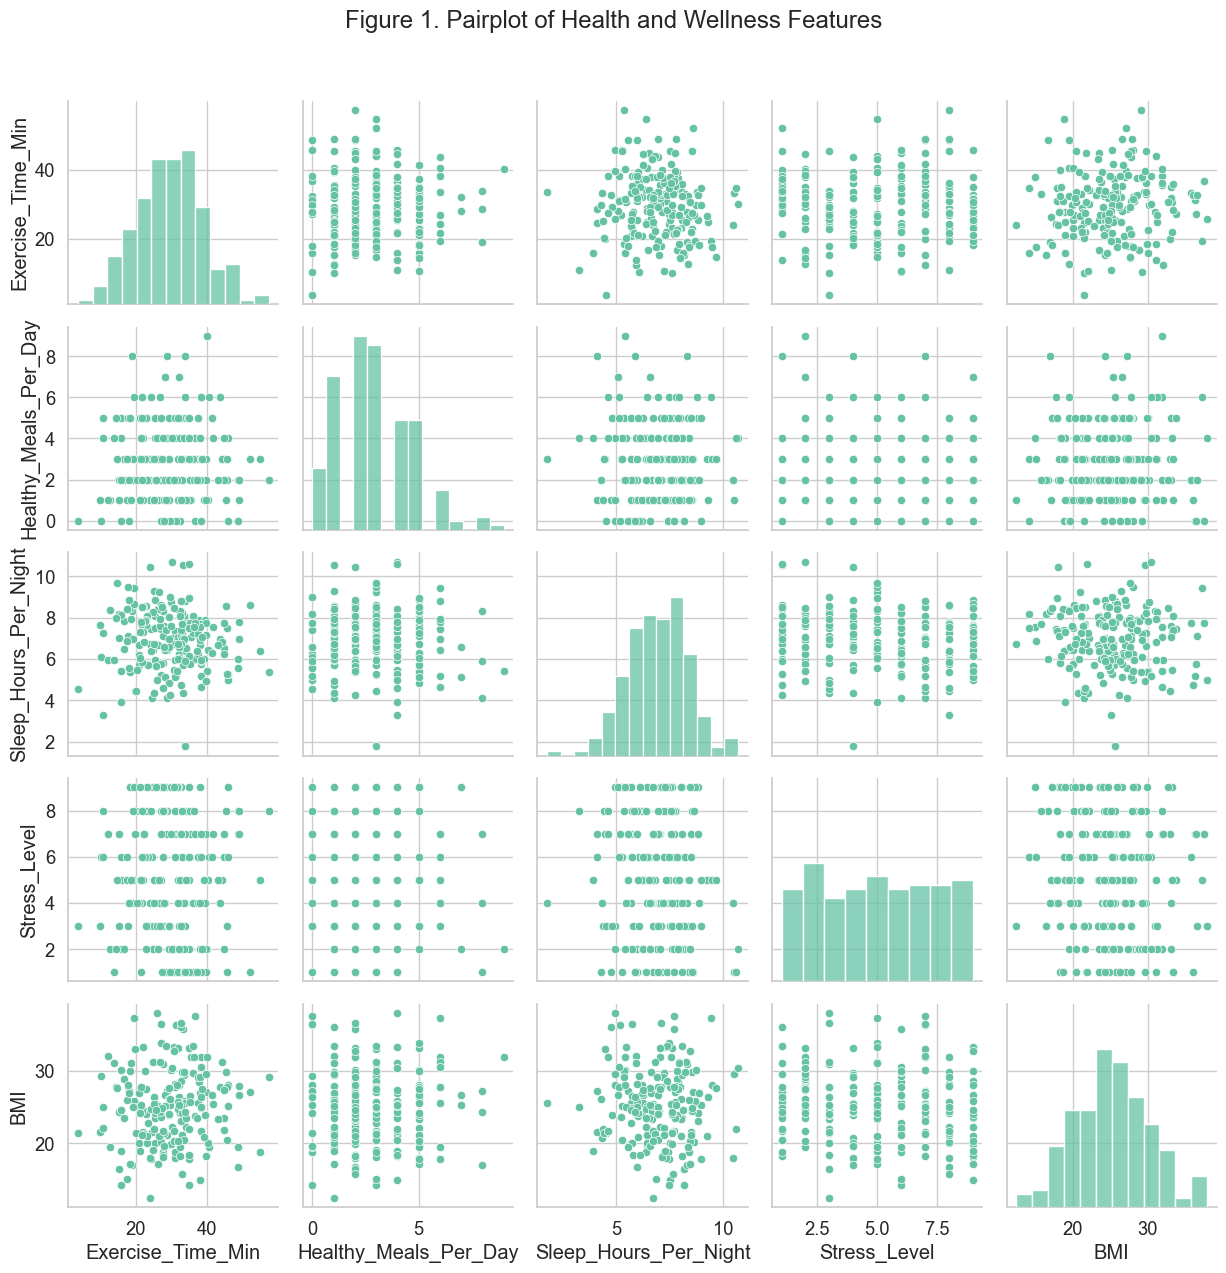

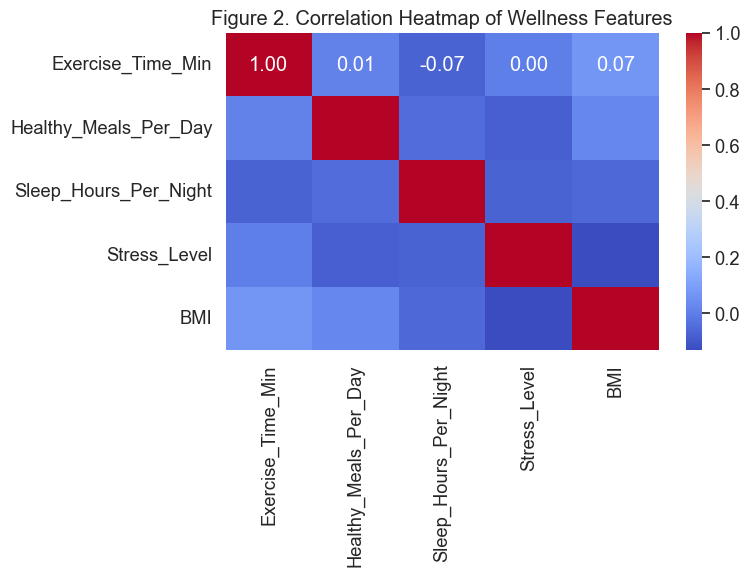

In [10]:
# Pairplot visualizes pairwise scatter plots and histograms for all features
sns.pairplot(df)
plt.suptitle("Figure 1. Pairplot of Health and Wellness Features", y=1.02)
plt.tight_layout()
plt.show()

# Correlation heatmap helps identify strong positive or negative correlations among features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 2. Correlation Heatmap of Wellness Features")
plt.tight_layout()
plt.show()

## Step 4: Data Preprocessing
## Standardize the feature values to have mean=0 and variance=1.

In [11]:
# This step is important because clustering algorithms are sensitive to feature scales.
features = df.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

## Step 5: K-Means Clustering on Original Data
## Use K-Means clustering to partition the data into distinct groups.


C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

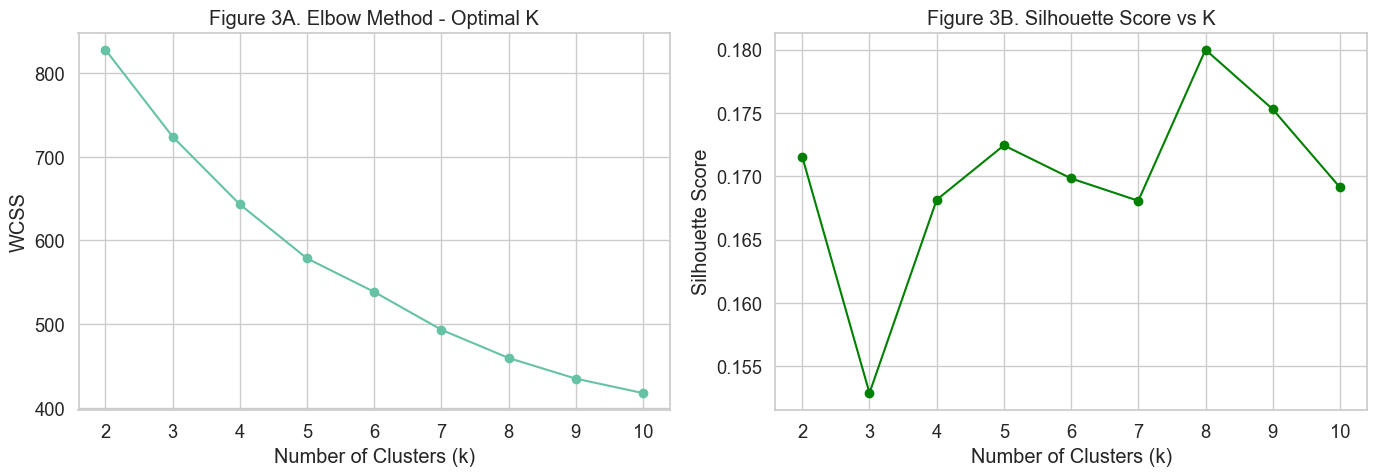

C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Use Elbow Method to find optimal number of clusters (k) by plotting WCSS (Within-Cluster Sum of Squares)
# Also compute silhouette scores which indicate how well-separated the clusters are

wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting WCSS and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method Plot
ax[0].plot(K_range, wcss, marker='o')
ax[0].set_title("Figure 3A. Elbow Method - Optimal K")
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("WCSS")

# Silhouette Score Plot
ax[1].plot(K_range, silhouette_scores, marker='o', color='green')
ax[1].set_title("Figure 3B. Silhouette Score vs K")
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# From these plots, select k=3 as optimal cluster number
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster assignments back to the dataframe
df['KMeans_Cluster'] = kmeans_labels


## Step 6: Hierarchical Clustering on Original Data
## Hierarchical clustering builds nested clusters by progressively merging or splitting clusters.

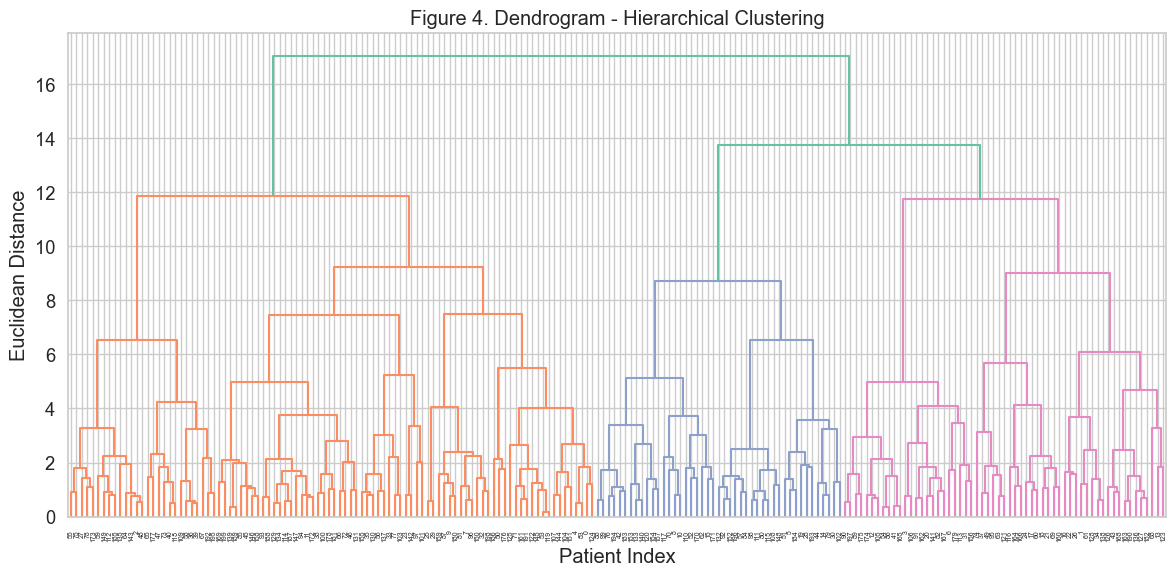

HC_Cluster
0             96
1             59
2             45
Name: count, dtype: int64


C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
# Plot dendrogram to visualize cluster hierarchy and determine number of clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Figure 4. Dendrogram - Hierarchical Clustering")
plt.xlabel("Patient Index")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

# Choose 3 clusters based on dendrogram
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add hierarchical cluster assignments to dataframe
df['HC_Cluster'] = hc_labels

# Display number of samples in each hierarchical cluster
print(df[['HC_Cluster']].value_counts())

## Step 7: Principal Component Analysis (PCA)
## Reduce the dimensionality of data to 2 components for visualization and possible improved clustering performance.


Explained Variance Ratio: [0.23691549 0.22082517]
Total Variance Explained: 0.4577406554157636


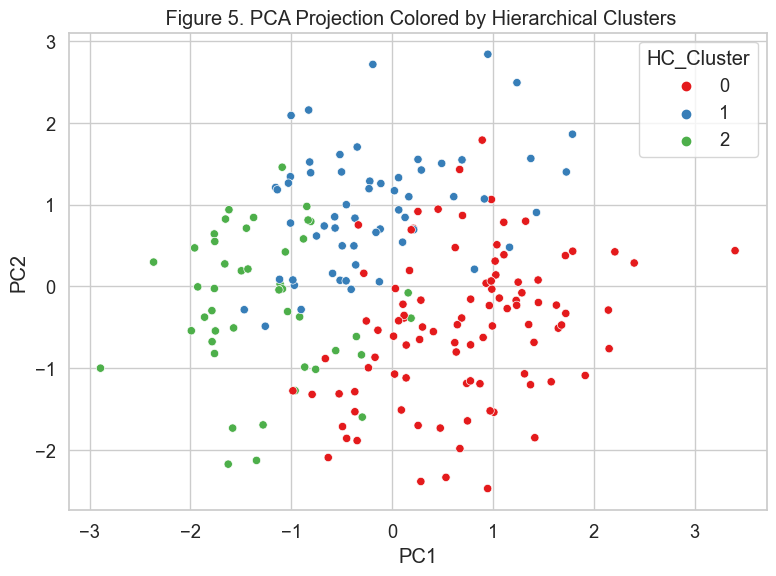

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create dataframe with PCA components
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Print explained variance to understand how much info PCA retains
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))

# Visualize PCA results colored by hierarchical cluster assignments for interpretability
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue=df['HC_Cluster'], palette='Set1')
plt.title(" Figure 5. PCA Projection Colored by Hierarchical Clusters")
plt.tight_layout()
plt.show()



## Step 8: K-Means Clustering on PCA-Reduced Data
## Perform K-Means clustering again on the reduced 2D PCA dataset.

C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


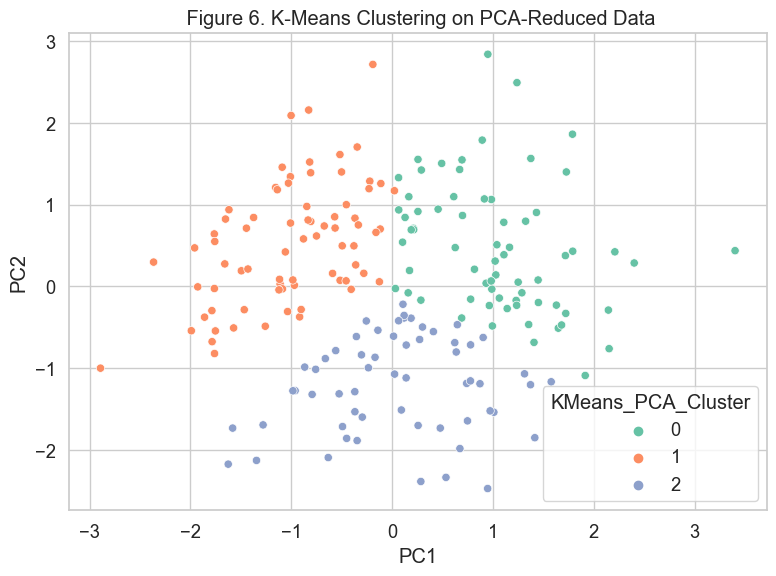

In [16]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

# Append cluster labels to PCA dataframe
pca_df["KMeans_PCA_Cluster"] = kmeans_pca_labels

# Visualize K-Means clusters on PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="KMeans_PCA_Cluster", palette="Set2")
plt.title(" Figure 6. K-Means Clustering on PCA-Reduced Data")
plt.tight_layout()
plt.show()

## Step 9: Hierarchical Clustering on PCA-Reduced Data
## Apply hierarchical clustering on PCA data.

C:\Users\cheli\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


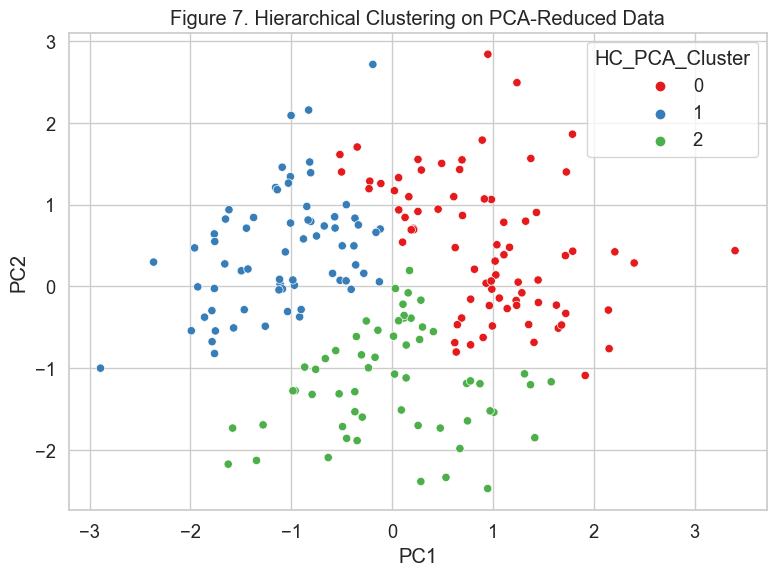

In [17]:
hc_pca = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_pca_labels = hc_pca.fit_predict(X_pca)

# Append cluster labels
pca_df["HC_PCA_Cluster"] = hc_pca_labels

# Visualize hierarchical clusters on PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="HC_PCA_Cluster", palette="Set1")
plt.title("Figure 7. Hierarchical Clustering on PCA-Reduced Data")
plt.tight_layout()
plt.show()



## Step 10: Compare Silhouette Scores of All Models
## Silhouette score measures cluster cohesion and separation; higher is better.


In [20]:
print("Silhouette Score (KMeans - Original Data):", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette Score (Hierarchical - Original Data):", silhouette_score(X_scaled, hc_labels))
print("Silhouette Score (KMeans - PCA Data):", silhouette_score(X_pca, kmeans_pca_labels))
print("Silhouette Score (Hierarchical - PCA Data):", silhouette_score(X_pca, hc_pca_labels))

Silhouette Score (KMeans - Original Data): 0.15286808008586905
Silhouette Score (Hierarchical - Original Data): 0.13628495765267165
Silhouette Score (KMeans - PCA Data): 0.3610048955224602
Silhouette Score (Hierarchical - PCA Data): 0.33440287604087543



## Step 11: Compute and Compare WCSS (Within-Cluster Sum of Squares) for All Models
## WCSS measures cluster compactness; lower values indicate tighter clusters.


In [21]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

def compute_wcss(X, labels):
    """
    Compute Within-Cluster Sum of Squares (WCSS) given data X and cluster labels.
    WCSS is the sum of squared distances between each point and its cluster centroid.
    """
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = X[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += ((cluster_points - centroid) ** 2).sum()
    return wcss

# Calculate WCSS for KMeans (Original Data)
wcss_kmeans_orig = kmeans.inertia_  # sklearn provides this directly

# Calculate WCSS for Hierarchical Clustering (Original Data)
wcss_hc_orig = compute_wcss(X_scaled, hc_labels)

# Calculate WCSS for KMeans (PCA Data)
wcss_kmeans_pca = kmeans_pca.inertia_

# Calculate WCSS for Hierarchical Clustering (PCA Data)
wcss_hc_pca = compute_wcss(X_pca, hc_pca_labels)

# Create a summary DataFrame for WCSS and Silhouette Scores
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['KMeans - Original', 'Hierarchical - Original', 'KMeans - PCA', 'Hierarchical - PCA'],
    'WCSS': [wcss_kmeans_orig, wcss_hc_orig, wcss_kmeans_pca, wcss_hc_pca],
    'Silhouette Score': [
        silhouette_score(X_scaled, kmeans_labels),
        silhouette_score(X_scaled, hc_labels),
        silhouette_score(X_pca, kmeans_pca_labels),
        silhouette_score(X_pca, hc_pca_labels)
    ]
})

print(comparison_df)


                     Model        WCSS  Silhouette Score
0        KMeans - Original  723.930786          0.152868
1  Hierarchical - Original  760.683274          0.136285
2             KMeans - PCA  190.418268          0.361005
3       Hierarchical - PCA  202.169193          0.334403


## Step 12: Visualize WCSS and Silhouette Score Comparisons

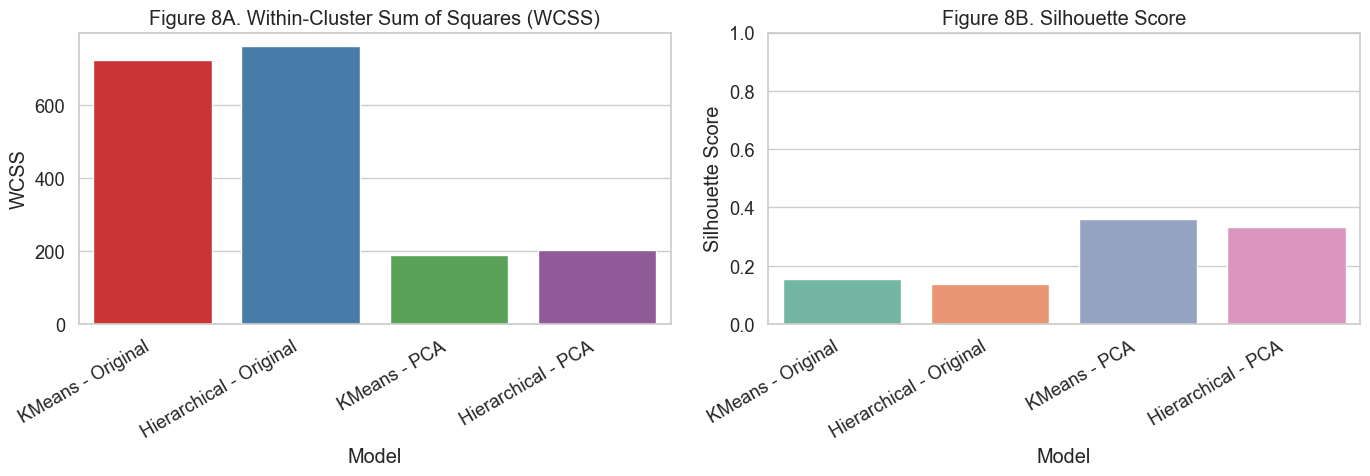

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for WCSS (Lower is better)
sns.barplot(data=comparison_df, x='Model', y='WCSS', ax=axes[0], palette='Set1')
axes[0].set_title('Figure 8A. Within-Cluster Sum of Squares (WCSS)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')

# Bar plot for Silhouette Score (Higher is better)
sns.barplot(data=comparison_df, x='Model', y='Silhouette Score', ax=axes[1], palette='Set2')
axes[1].set_title('Figure 8B. Silhouette Score')
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()